# Comparison between the types for the ages and genders

Questions

- What are the differences between the type for the different combinations of ages and genders?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between genders and ages (after controlling type)
GF_SPF_F_8w = results(dge,contrast= c(0,0,1,0,0,0,0,0,0,0), alpha=0.05, test="Wald")
GF_SPF_M_8w = results(dge,contrast= c(0,0,1,0,0,0,0,1,0,0), alpha=0.05, test="Wald")
GF_SPF_F_52w = results(dge,contrast= c(0,0,1,0,0,0,0,0,0,1), alpha=0.05, test="Wald")
GF_SPF_M_52w = results(dge,contrast= c(0,0,1,0,0,0,0,1,0,1), alpha=0.05, test="Wald")
GF_SPF_F_104w = results(dge,contrast= c(0,0,1,0,0,0,0,0,1,0), alpha=0.05, test="Wald")
GF_SPF_M_104w = results(dge,contrast= c(0,0,1,0,0,0,0,1,1,0), alpha=0.05, test="Wald")
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")
to_comp = c("GF VS SPF (F, 8w)", "GF VS SPF (M, 8w)", "GF VS SPF (F, 52w)", "GF VS SPF (M, 52w)", "GF VS SPF (F, 104w)", "GF VS SPF (M, 104w)")

# Differentially expressed genes

In [7]:
type_gender_age_data = list(GF_SPF_F_8w, GF_SPF_M_8w, GF_SPF_F_52w, GF_SPF_M_52w, GF_SPF_F_104w, GF_SPF_M_104w)
names(type_gender_age_data) = to_comp
type_gender_age_deg = extract_diff_expr_genes(type_gender_age_data, "type-effect/type_gender_age/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

Warning message:
“Removed 14812 rows containing non-finite values (stat_density).”

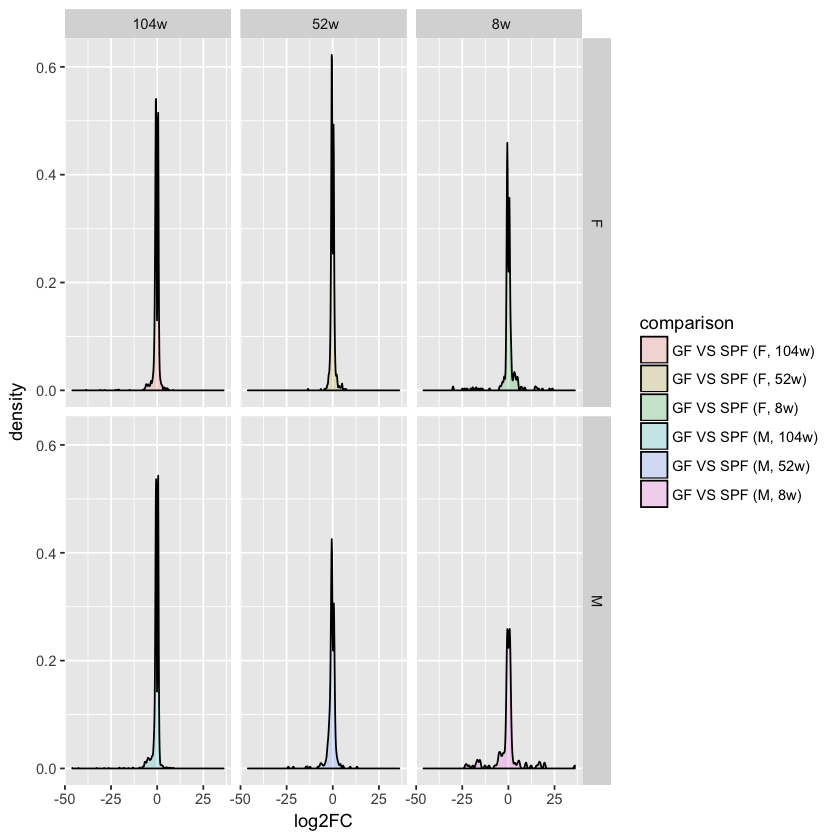

In [8]:
data = melt(type_gender_age_deg$fc_deg)
colnames(data) = c("genes", "comparison", "log2FC")
s1 = strsplit(as.character(data$comparison), ",")
data$gender = sapply(s1, function(s) return(tail(unlist(strsplit(s[1],"")), n = 1)))
data$age = sapply(s1, function(s) return(gsub('.{1}$', '', s[2])))   
ggplot(data , aes(x=log2FC, fill=comparison))+
  geom_density(alpha=0.2, position="identity")+
  facet_grid(gender ~ age)

# Stats

,All DEG (Wald padj < 0.05),All over-expressed genes (Wald padj < 0.05 & FC > 0),All under-expressed genes (Wald padj < 0.05 & FC < 0),DEG (Wald padj < 0.05 & abs(FC) >= 1.5),Over-expressed genes (Wald padj < 0.05 & FC >= 1.5),Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)
"GF VS SPF (F, 8w)",392,192,200,227,113,114
"GF VS SPF (M, 8w)",161,76,85,110,54,56
"GF VS SPF (F, 52w)",738,316,422,322,122,200
"GF VS SPF (M, 52w)",393,145,248,237,81,156
"GF VS SPF (F, 104w)",2038,846,1192,1154,313,841
"GF VS SPF (M, 104w)",2172,898,1274,1169,300,869


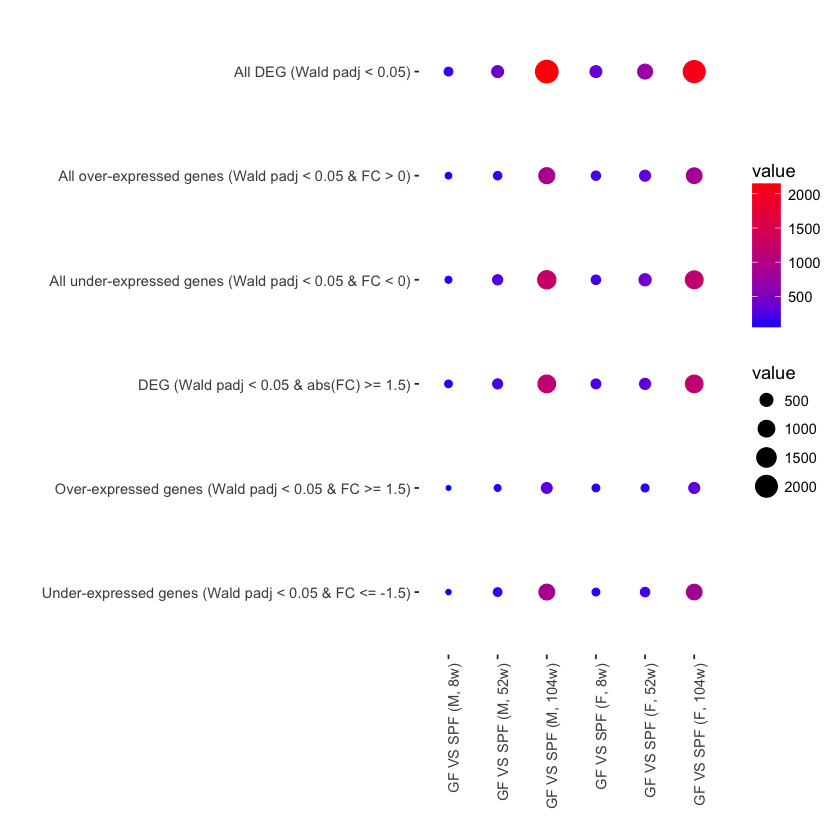

In [9]:
type_gender_age_deg$stat
plot_stat_mat(type_gender_age_deg$stat)

## All DEG (Wald padj < 0.05)

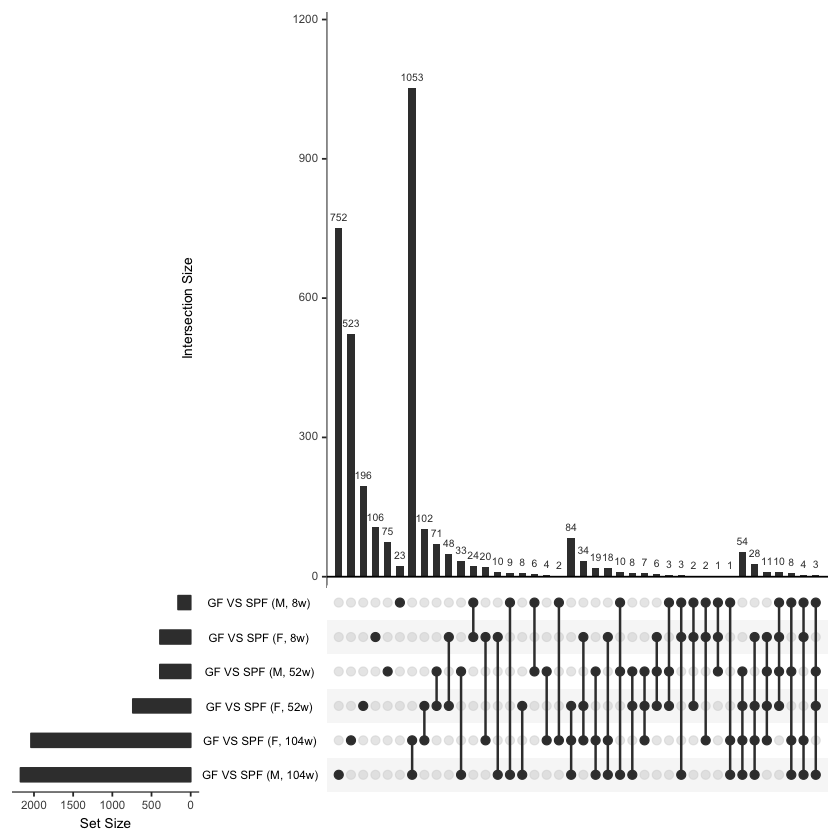

In [10]:
# Differentially expressed genes
upset(as.data.frame(type_gender_age_deg$deg),nsets = 6)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

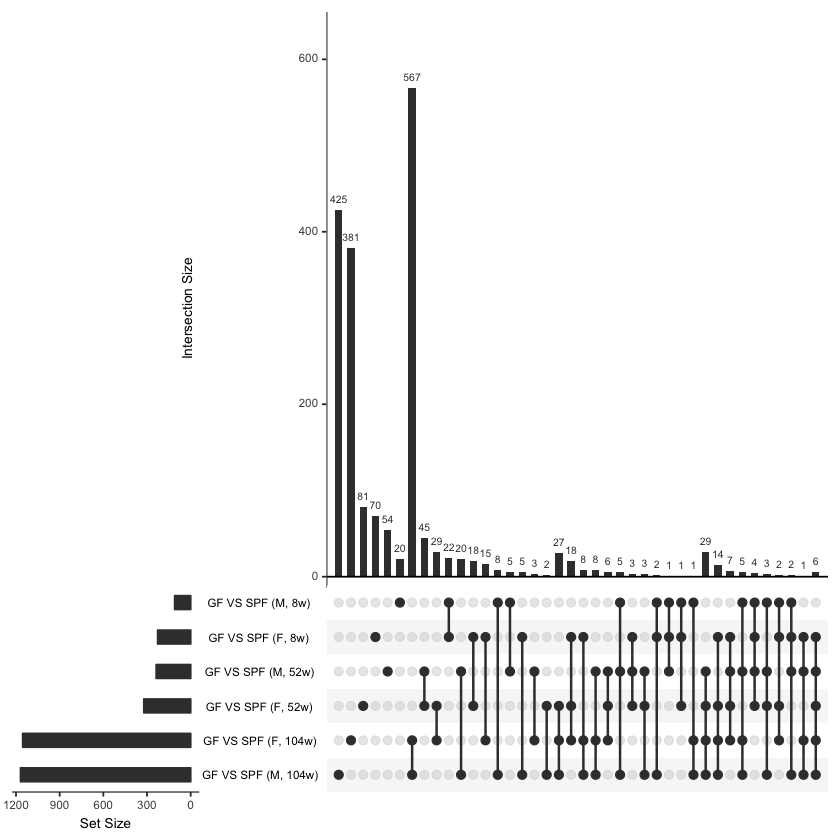

In [11]:
upset(as.data.frame(1*(!is.na(type_gender_age_deg$sign_fc_deg))),nsets = 6)

# Log2FC for DEG (Wald padj < 0.05 & abs(FC) > 1.5)

,comp,gender,age
"GF VS SPF (F, 8w)",GF VS SPF,F,8w
"GF VS SPF (M, 8w)",GF VS SPF,M,8w
"GF VS SPF (F, 52w)",GF VS SPF,F,52w
"GF VS SPF (M, 52w)",GF VS SPF,M,52w
"GF VS SPF (F, 104w)",GF VS SPF,F,104w
"GF VS SPF (M, 104w)",GF VS SPF,M,104w


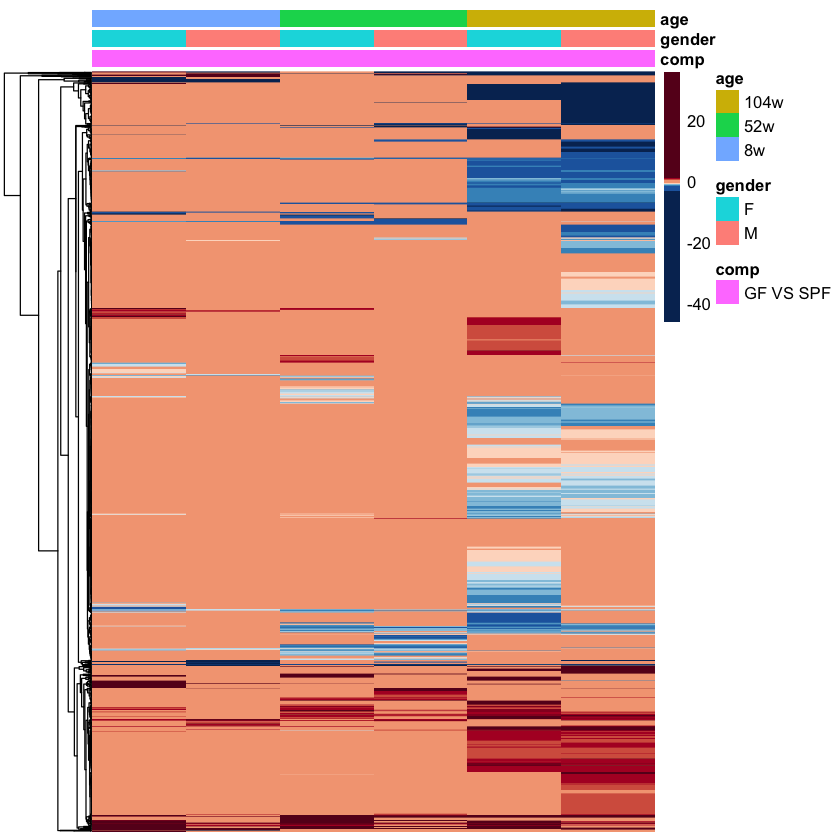

In [12]:
fc_annot = data.frame(comp = rep("GF VS SPF",2),
                      gender = rep(c("F","M"), 3),
                      age = c(rep("8w",2), rep("52w",2), rep("104w",2)))
rownames(fc_annot) = colnames(type_gender_age_deg$sign_fc_deg)
fc_annot
plot_fc_heatmap(type_gender_age_deg$sign_fc_deg, fc_annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

GF vs SPF | 8w | 52w | 104w
--- | --- | ---
F | | |
M | | |

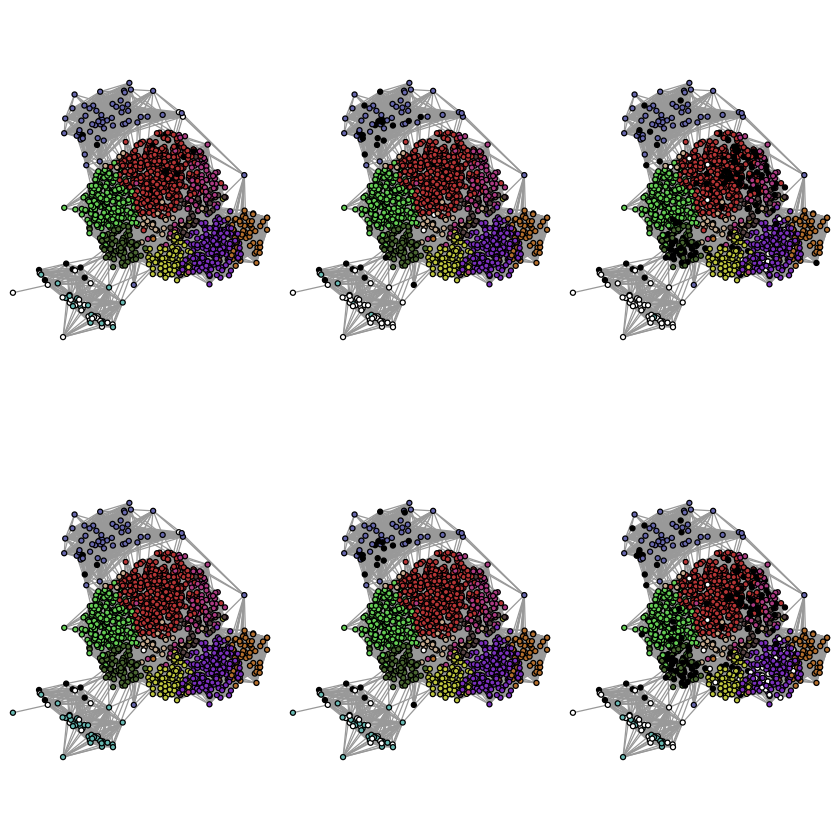

In [13]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
col_GF_vs_SPF_8w_F = get_deg_colors(type_gender_age_deg, "GF VS SPF (F, 8w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_8w_M = get_deg_colors(type_gender_age_deg, "GF VS SPF (M, 8w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_52w_F = get_deg_colors(type_gender_age_deg, "GF VS SPF (F, 52w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_52w_M = get_deg_colors(type_gender_age_deg, "GF VS SPF (M, 52w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_104w_F = get_deg_colors(type_gender_age_deg, "GF VS SPF (F, 104w)", connected_gene_colors, module_nb)
col_GF_vs_SPF_104w_M = get_deg_colors(type_gender_age_deg, "GF VS SPF (M, 104w)", connected_gene_colors, module_nb)

plot_net_with_layout(net, col_GF_vs_SPF_8w_F, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_52w_F, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_104w_F, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_8w_M, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_52w_M, pal2, layout, add_legend = FALSE)
plot_net_with_layout(net, col_GF_vs_SPF_104w_M, pal2, layout, add_legend = FALSE)

# GO analysis

In [14]:
full_go_desc = type_gender_age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_gender_age_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the 20 most significant p-values for the different comparison

Using term, id as id variables
Using term, id as id variables


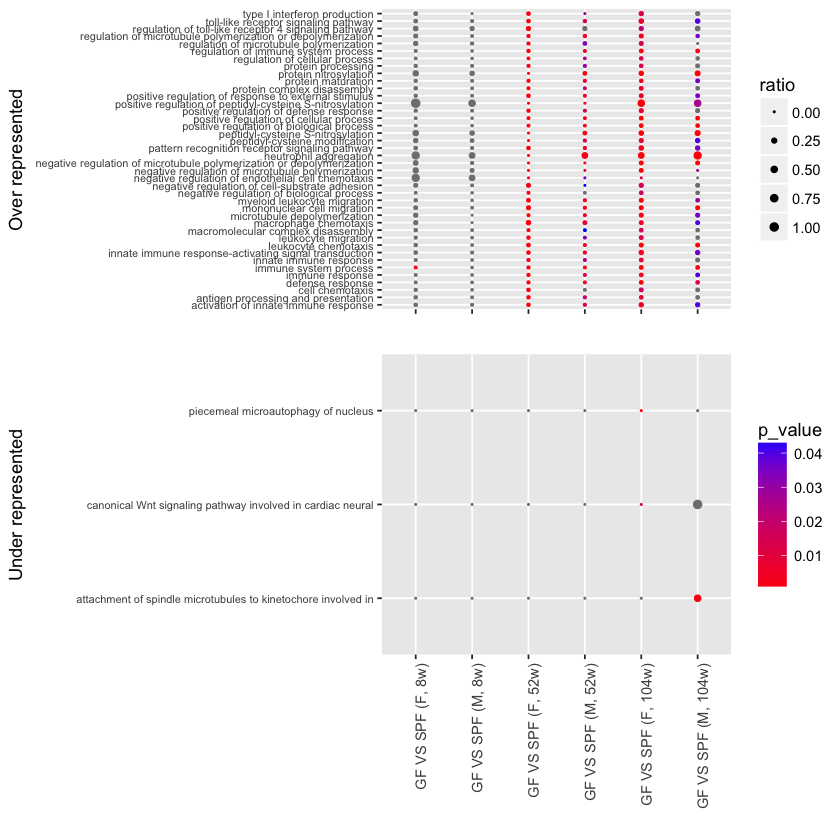

In [15]:
plot_top_go(type_gender_age_deg,
            "BP",
            40)  

Network based on description similarity

In [16]:
BP_network = create_GO_network(type_gender_age_deg, "BP", BP_GO)

GF vs SPF | 8w | 52w | 104w
--- | --- | ---
F | | |
M | | |

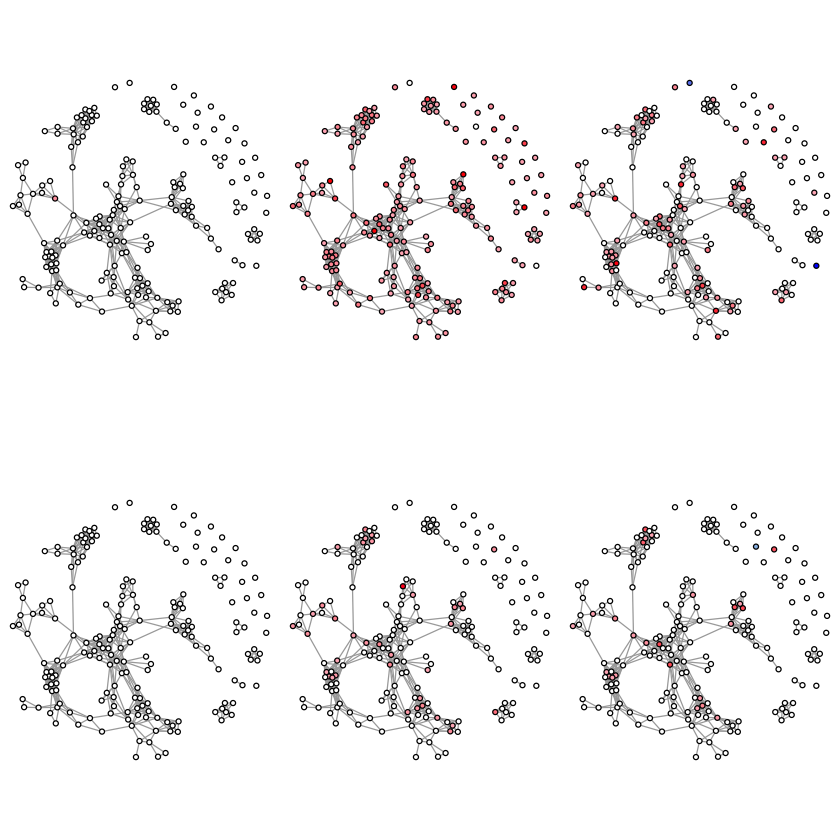

In [17]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "GF VS SPF (F, 8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (F, 52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (F, 104w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, 8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, 52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, 104w)", full_go_desc, plot_interactive = FALSE)

### GF VS SPF (F, 8w)

In [18]:
col = get_GO_network_col(BP_network, "GF VS SPF (F, 8w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_8w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_8w.png"

### GF VS SPF (M, 8w)

In [19]:
col = get_GO_network_col(BP_network, "GF VS SPF (M, 8w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_8w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_8w.png"

### GF VS SPF (F, 52w)

In [20]:
col = get_GO_network_col(BP_network, "GF VS SPF (F, 52w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_52w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_52w.png"

### GF VS SPF (M, 52w)

In [21]:
col = get_GO_network_col(BP_network, "GF VS SPF (M, 52w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_52w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_52w.png"

### GF VS SPF (F, 104w)

In [22]:
col = get_GO_network_col(BP_network, "GF VS SPF (F, 104w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_104w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_104w.png"

### GF VS SPF (M, 104w)

In [23]:
col = get_GO_network_col(BP_network, "GF VS SPF (M, 104w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_104w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_104w.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


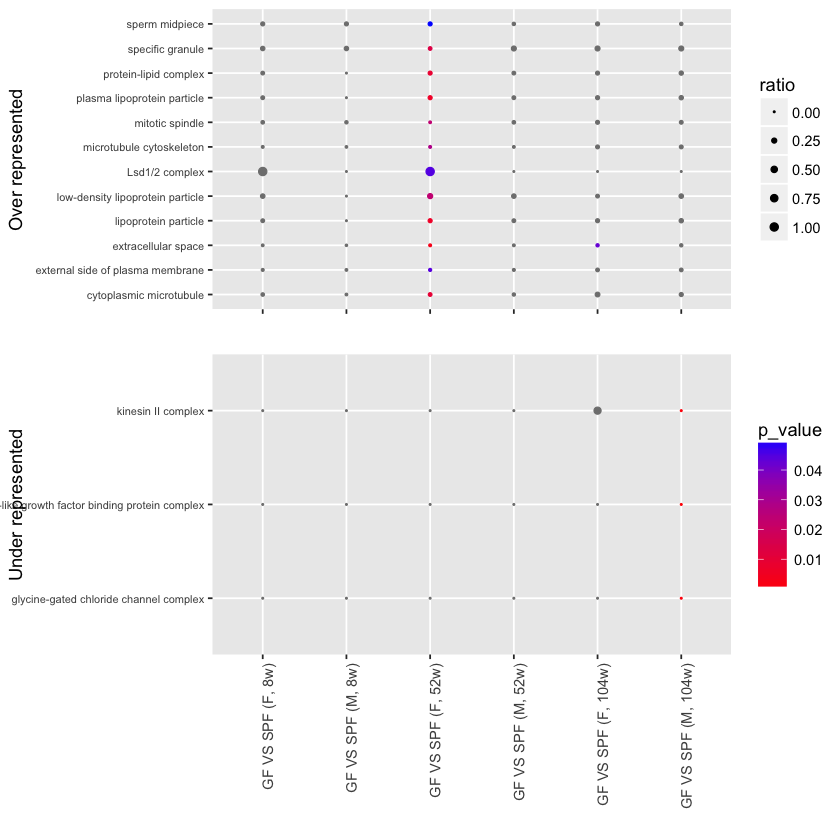

In [24]:
plot_top_go(type_gender_age_deg,
            "CC",
            40)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


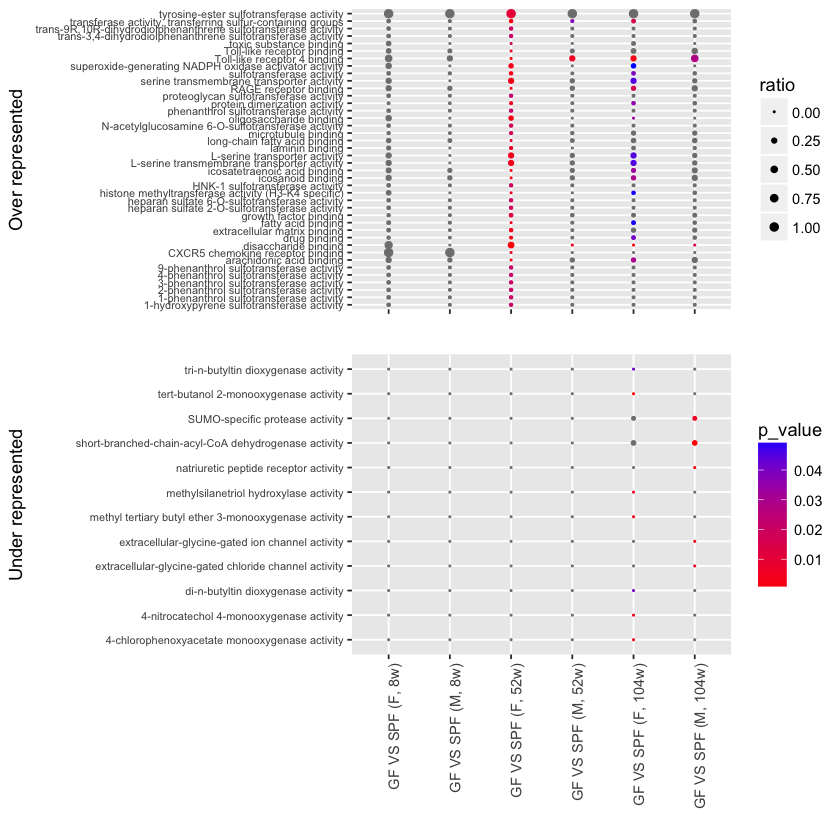

In [25]:
plot_top_go(type_gender_age_deg,
            "MF",
            40)

# KEGG pathways

In [26]:
plot_kegg_pathways(type_gender_age_deg$over_represented_KEGG[,"category"],
                   type_gender_age_deg$fc_deg,
                   "../results/dge/type-effect/type_gender_age/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 33 rows, data has 37


Pathway graphs available at ../results/dge/type-effect/type_gender_age/over_repr_kegg/

In [ ]:
plot_kegg_pathways(type_gender_age_deg$under_represented_KEGG[,"category"],
                   type_gender_age_deg$fc_deg,
                   "../results/dge/type-effect/type_gender_age/kegg/under_repr_kegg/")

Pathway graphs available at ../results/dge/type-effect/type_gender_age/under_repr_kegg/

# Comparison with Erny results

Protocol: 2 months old female mices (GF vs SPF)

In [ ]:
# our data
GF_SPF_F_8w_fc_deg = type_gender_age_deg$fc_deg[,1]
GF_SPF_F_8w_fc_deg = GF_SPF_F_8w_fc_deg[!is.na(GF_SPF_F_8w_fc_deg)]

## Raw comparison of the results

In [ ]:
# Erny data: transform the gene symbol and use log2(FC)
erny_results = read.csv("../data/erny_results.csv")
erny_results[,1] = capFirst(as.character(erny_results[,1]))
erny_results[,2] = as.character(erny_results[,2])
erny_results[,3] = log2(erny_results[,3])
erny_results[erny_results[,1] == "1700001c19rik",1] = "1700001C19Rik"
erny_results[erny_results[,1] == "Fam125a",1] = "Mvb12a"
erny_results[erny_results[,1] == "Sepw1",1] = "Selenow"
erny_results[erny_results[,1] == "Ppapdc3",1] = "Plpp7"
erny_results[erny_results[,1] == "Ccdc101",1] = "Sgf29"
erny_results[erny_results[,1] == "Tcfeb",1] = "Tfeb"
erny_results[erny_results[,1] == "2810408m09rik",1] = "Trp53rka"
erny_results[erny_results[,1] == "2300009a05rik",1] = "2300009A05Rik"
erny_results[erny_results[,1] == "2900010m23rik",1] = "Uqcc2"
erny_results[erny_results[,1] == "Ccdc55",1] = "Nsrp1"
erny_results[erny_results[,1] == "Phf15",1] = "Jade2"
erny_results[erny_results[,1] == "Mobkl2a",1] = "Mob3a"
erny_results[erny_results[,1] == "C030046i01rik",1] = "R3hdm4"
erny_results[erny_results[,1] == "H2-dmb1",1] = "H2-DMb1"
erny_results[erny_results[,1] == "D15ertd621e",1] = "Fam91a1"
erny_results[erny_results[,1] == "Bc030336",1] = "BC030336"
erny_results[erny_results[,1] == "C330007p06rik",1] = "C330007P06Rik"
erny_results[erny_results[,1] == "4931406h21rik",1] = "4931406H21Rik"
erny_results[erny_results[,1] == "Gm13253",1] = "Rps15a-ps4"
erny_results[erny_results[,1] == "Hiatl1",1] = "Mfsd14b"
erny_results[erny_results[,1] == "Bc031353",1] = "Fam214a"
erny_results[erny_results[,1] == "Cep110",1] = "Cntrl"
erny_results[erny_results[,1] == "B130006d01rik",1] = "B130006D01Rik"
erny_results[erny_results[,1] == "D6wsu163e",1] = "D6Wsu163e"
erny_results[erny_results[,1] == "Fam82b",1] = "Rmdn1"
erny_results[erny_results[,1] == "6030458c11rik",1] = "6030458C11Rik"
erny_results[erny_results[,1] == "Smek2",1] = "Ppp4r3b"
erny_results[erny_results[,1] == "9330151l19rik",1] = "9330151L19Rik"
erny_results[erny_results[,1] == "2010015l04rik",1] = "Cfap74"
erny_results[erny_results[,1] == "Ccdc46",1] = "Cep112"
erny_results[erny_results[,1] == "4932438a13rik",1] = "4932438A13Rik"
erny_results[erny_results[,1] == "B930003m22rik",1] = "Cahm"
erny_results[erny_results[,1] == "4933406i18rik",1] = "4933406I18Rik"
erny_results[erny_results[,1] == "4933434e20rik",1] = "4933434E20Rik"
erny_results[erny_results[,1] == "Ccdc90a",1] = "Mcur1"
erny_results[erny_results[,1] == "9930021j03rik",1] = "9930021J03Rik"
erny_results[erny_results[,1] == "E030024n20rik",1] = "E030024N20Rik"
erny_results[erny_results[,1] == "C78339",1] = "Fam8a1"
erny_results[erny_results[,1] == "2700049a03rik",1] = "2700049A03Rik"
erny_results[erny_results[,1] == "9530008l14rik",1] = "Adtrp"
erny_results[erny_results[,1] == "4930578n16rik",1] = "Ccdc173"
erny_results[erny_results[,1] == "Tmem22",1] = "Slc35g2"
erny_results[erny_results[,1] == "Fert2",1] = "Fer"
erny_results[erny_results[,1] == "D830031n03rik",1] = "D830031N03Rik"
erny_results[erny_results[,1] == "A730069n07rik",1] = "Dlc1"
erny_results[erny_results[,1] == "1700020d05rik",1] = "1700020D05Rik"
erny_results[erny_results[,1] == "Nlrp1c",1] = "Nlrp1c-ps"
erny_results[erny_results[,1] == "D3ertd751e",1] = "D3Ertd751e"

In [ ]:
head(erny_results)
head(GF_SPF_F_8w_fc_deg)

In [ ]:
# Comparison btw our and Erny data: matrix with 2 columns (log2FC in our and in Erny data for each genes)
GF_SPF_F_8w_comp = cbind(erny_results[,3], GF_SPF_F_8w_fc_deg[erny_results[,1]])
colnames(GF_SPF_F_8w_comp) = c("erny", "our")
rownames(GF_SPF_F_8w_comp) = erny_results[,1]
'%ni%' = Negate('%in%')
non_genes = names(GF_SPF_F_8w_fc_deg) %ni% erny_results[,1]
GF_SPF_F_8w_comp = rbind(GF_SPF_F_8w_comp, cbind(rep(NA, sum(non_genes)), sort(GF_SPF_F_8w_fc_deg[non_genes], decreasing = T)))
GF_SPF_F_8w_comp[!is.na(GF_SPF_F_8w_comp[,1]) & !is.na(GF_SPF_F_8w_comp[,2]),]

In [ ]:
pheatmap(GF_SPF_F_8w_comp, cluster_rows=F, cluster_cols=F, show_rownames=F, show_colnames=F, color=inferno(10))  

## Detailed comparison

- Checking the correlation between the counts of Erny and our counts
- Re-running a DGE analysis on the Erny's raw counts

In [ ]:
SPF_F_8w_samples = c('SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2')
GF_F_8w_samples = c('GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2')
SPF_8w_counts = counts[,SPF_F_8w_samples]
GF_8w_counts = counts[,GF_F_8w_samples]

In [ ]:
# Erny data: counts and try to correlate them with our counts
erny_counts = read.csv("../data/erny_counts.csv")
erny_counts[,1] = capFirst(as.character(erny_counts[,1]))
rownames(erny_counts) = erny_counts[,2]
erny_counts = erny_counts[,c(1,4:17)]
erny_counts[erny_counts[,1] == "1700001c19rik",1] = "1700001C19Rik"
erny_counts[erny_counts[,1] == "Fam125a",1] = "Mvb12a"
erny_counts[erny_counts[,1] == "Sepw1",1] = "Selenow"
erny_counts[erny_counts[,1] == "Ppapdc3",1] = "Plpp7"
erny_counts[erny_counts[,1] == "Ccdc101",1] = "Sgf29"
erny_counts[erny_counts[,1] == "Tcfeb",1] = "Tfeb"
erny_counts[erny_counts[,1] == "2810408m09rik",1] = "Trp53rka"
erny_counts[erny_counts[,1] == "2300009a05rik",1] = "2300009A05Rik"
erny_counts[erny_counts[,1] == "2900010m23rik",1] = "Uqcc2"
erny_counts[erny_counts[,1] == "Ccdc55",1] = "Nsrp1"
erny_counts[erny_counts[,1] == "Phf15",1] = "Jade2"
erny_counts[erny_counts[,1] == "Mobkl2a",1] = "Mob3a"
erny_counts[erny_counts[,1] == "C030046i01rik",1] = "R3hdm4"
erny_counts[erny_counts[,1] == "H2-dmb1",1] = "H2-DMb1"
erny_counts[erny_counts[,1] == "D15ertd621e",1] = "Fam91a1"
erny_counts[erny_counts[,1] == "Bc030336",1] = "BC030336"
erny_counts[erny_counts[,1] == "C330007p06rik",1] = "C330007P06Rik"
erny_counts[erny_counts[,1] == "4931406h21rik",1] = "4931406H21Rik"
erny_counts[erny_counts[,1] == "Gm13253",1] = "Rps15a-ps4"
erny_counts[erny_counts[,1] == "Hiatl1",1] = "Mfsd14b"
erny_counts[erny_counts[,1] == "Bc031353",1] = "Fam214a"
erny_counts[erny_counts[,1] == "Cep110",1] = "Cntrl"
erny_counts[erny_counts[,1] == "B130006d01rik",1] = "B130006D01Rik"
erny_counts[erny_counts[,1] == "D6wsu163e",1] = "D6Wsu163e"
erny_counts[erny_counts[,1] == "Fam82b",1] = "Rmdn1"
erny_counts[erny_counts[,1] == "6030458c11rik",1] = "6030458C11Rik"
erny_counts[erny_counts[,1] == "Smek2",1] = "Ppp4r3b"
erny_counts[erny_counts[,1] == "9330151l19rik",1] = "9330151L19Rik"
erny_counts[erny_counts[,1] == "2010015l04rik",1] = "Cfap74"
erny_counts[erny_counts[,1] == "Ccdc46",1] = "Cep112"
erny_counts[erny_counts[,1] == "4932438a13rik",1] = "4932438A13Rik"
erny_counts[erny_counts[,1] == "B930003m22rik",1] = "Cahm"
erny_counts[erny_counts[,1] == "4933406i18rik",1] = "4933406I18Rik"
erny_counts[erny_counts[,1] == "4933434e20rik",1] = "4933434E20Rik"
erny_counts[erny_counts[,1] == "Ccdc90a",1] = "Mcur1"
erny_counts[erny_counts[,1] == "9930021j03rik",1] = "9930021J03Rik"
erny_counts[erny_counts[,1] == "E030024n20rik",1] = "E030024N20Rik"
erny_counts[erny_counts[,1] == "C78339",1] = "Fam8a1"
erny_counts[erny_counts[,1] == "2700049a03rik",1] = "2700049A03Rik"
erny_counts[erny_counts[,1] == "9530008l14rik",1] = "Adtrp"
erny_counts[erny_counts[,1] == "4930578n16rik",1] = "Ccdc173"
erny_counts[erny_counts[,1] == "Tmem22",1] = "Slc35g2"
erny_counts[erny_counts[,1] == "Fert2",1] = "Fer"
erny_counts[erny_counts[,1] == "D830031n03rik",1] = "D830031N03Rik"
erny_counts[erny_counts[,1] == "A730069n07rik",1] = "Dlc1"
erny_counts[erny_counts[,1] == "1700020d05rik",1] = "1700020D05Rik"
erny_counts[erny_counts[,1] == "Nlrp1c",1] = "Nlrp1c-ps"
erny_counts[erny_counts[,1] == "D3ertd751e",1] = "D3Ertd751e"

In [ ]:
# Extract counts comparable with our counts
comparable = which(erny_counts[,1] %in% rownames(GF_8w_counts))
erny_GF_counts = erny_counts[comparable,c("Symbols",paste("GF_", 1:5, sep=""),paste("GF_", 7:8, sep=""))]
erny_SPF_counts = erny_counts[comparable,c("Symbols",paste("SPF_", 1:4, sep=""),paste("SPF_", 6:8, sep=""))]
# Extract counts comparable with Erny's counts
GF_F_8w_counts = GF_8w_counts[erny_GF_counts[,1],]
SPF_F_8w_counts = SPF_8w_counts[erny_SPF_counts[,1],]
# Check again the genes
genes = which(erny_GF_counts[,1] == rownames(GF_F_8w_counts))
erny_GF_counts = erny_GF_counts[genes,]
erny_SPF_counts = erny_SPF_counts[genes,]
GF_F_8w_counts = GF_F_8w_counts[genes,]
SPF_F_8w_counts = SPF_F_8w_counts[genes,]
sum(erny_SPF_counts[,1] != rownames(SPF_F_8w_counts))
sum(erny_SPF_counts[,1] == rownames(SPF_F_8w_counts))
# Compute correlation between the counts of Erny and ours
sapply(1:dim(SPF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(SPF_F_8w_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(1:dim(GF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_GF_counts)[2], function(x) cor.test(GF_F_8w_counts[,y],erny_GF_counts[,x])$estimate)))
sapply(1:dim(GF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(GF_F_8w_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(2:dim(erny_GF_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(erny_GF_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(1:dim(SPF_F_8w_counts)[2], function(y) return(sapply(2:dim(GF_F_8w_counts)[2], function(x) cor.test(SPF_F_8w_counts[,y],GF_F_8w_counts[,x])$estimate)))

In [ ]:
# Run a DGE expression on the Erny counts
erny_dge_counts = erny_counts[,c(2:15)]
head(erny_dge_counts)
erny_metadata = matrix(c(rep("GF",7),rep("SPF",7)))
colnames(erny_metadata) = c("type")
# Construct DESeqDataSet
erny_dds = DESeqDataSetFromMatrix(
        countData = erny_dge_counts,
        colData = erny_metadata,
        design = ~ type)
# Organize levels of the factors (8w being the reference)
erny_dds$type = relevel(erny_dds$type, ref="SPF")
# Differential expression analysis
erny_dge = DESeq(erny_dds)

In [ ]:
# Extraction of DE genes
erny_dge_res = results(erny_dge, alpha=0.05, test="Wald")
erny_sign_deg = erny_dge_res[which(erny_dge_res$padj < 0.05),]

In [ ]:
# Run a DGE expression on our counts with only the F 8w samples
SPF_GF_8w_F_counts = cbind(GF_8w_counts, SPF_8w_counts)
SPF_GF_8w_F_metadata = matrix(t(sapply(sapply(colnames(SPF_GF_8w_F_counts), strsplit, split = "_"), unlist))[,1])
colnames(SPF_GF_8w_F_metadata) = c("type")
# Construct DESeqDataSet
SPF_GF_8w_F_dds = DESeqDataSetFromMatrix(
        countData = SPF_GF_8w_F_counts,
        colData = SPF_GF_8w_F_metadata,
        design = ~ type)
# Organize levels of the factors
SPF_GF_8w_F_dds$type = relevel(SPF_GF_8w_F_dds$type, ref="SPF")
# Differential expression analysis
SPF_GF_8w_F_dge = DESeq(SPF_GF_8w_F_dds)

In [ ]:
# Extraction of the DE genes
SPF_GF_8w_F_dge_res = results(SPF_GF_8w_F_dge, alpha=0.05, test="Wald")
SPF_GF_8w_F_sign_deg = SPF_GF_8w_F_dge_res[which(SPF_GF_8w_F_dge_res$padj < 0.05),]

In [ ]:
SPF_GF_8w_F_comp = matrix("", nrow=4,ncol=4)
rownames(SPF_GF_8w_F_comp) = c("Original Erny results", "DESeq on Erny counts", "DESeq with only the 8w F", "Full DESeq")
colnames(SPF_GF_8w_F_comp) = rownames(SPF_GF_8w_F_comp)
SPF_GF_8w_F_comp[1,1] = dim(erny_results)[1]
SPF_GF_8w_F_comp[2,2] = dim(erny_sign_deg)[1]
SPF_GF_8w_F_comp[3,3] = dim(SPF_GF_8w_F_sign_deg)[1]
SPF_GF_8w_F_comp[4,4] = length(GF_SPF_F_8w_fc_deg)
SPF_GF_8w_F_comp[1,2] = sum(rownames(erny_sign_deg) %in% erny_results[,2])
SPF_GF_8w_F_comp[1,3] = sum(rownames(SPF_GF_8w_F_sign_deg) %in% erny_results[,1])
SPF_GF_8w_F_comp[1,4] = sum(names(GF_SPF_F_8w_fc_deg) %in% erny_results[,1])
erny_sign_deg_symbols = erny_counts[rownames(erny_sign_deg),1]
SPF_GF_8w_F_comp[2,3] = sum(erny_sign_deg_symbols %in% rownames(SPF_GF_8w_F_sign_deg))
SPF_GF_8w_F_comp[2,4] = sum(erny_sign_deg_symbols %in% names(GF_SPF_F_8w_fc_deg))
SPF_GF_8w_F_comp[3,4] = sum(rownames(SPF_GF_8w_F_sign_deg) %in% names(GF_SPF_F_8w_fc_deg))
SPF_GF_8w_F_comp
#
t1 = rownames(SPF_GF_8w_F_sign_deg[rownames(SPF_GF_8w_F_sign_deg) %in% erny_results[,1],])
t2 = names(GF_SPF_F_8w_fc_deg[names(GF_SPF_F_8w_fc_deg) %in% erny_results[,1]])
sum(t1 %in% t2)
# 
t1 = rownames(SPF_GF_8w_F_sign_deg[rownames(SPF_GF_8w_F_sign_deg) %in% erny_sign_deg_symbols,])
t2 = names(GF_SPF_F_8w_fc_deg[names(GF_SPF_F_8w_fc_deg) %in% erny_sign_deg_symbols])
sum(t1 %in% t2)